In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [38]:
tf.__version__

'2.3.0'

In [33]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32

In [28]:
path = "data/all.txt"
data = pd.read_csv(path, sep=" ", header=None)
data[0] = "data/PATCHES/" + data[0]
filenames = data[0].values.tolist()
labels = data[1].values.tolist()

In [31]:
filenames[:5], len(filenames), labels[:5], len(filenames)

(['data/PATCHES/RAINY/2016-02-12/camera7/R_2016-02-12_12.25_C07_275.jpg',
  'data/PATCHES/SUNNY/2016-01-15/camera7/S_2016-01-15_09.41_C07_284.jpg',
  'data/PATCHES/OVERCAST/2015-12-03/camera1/O_2015-12-03_16.41_C01_224.jpg',
  'data/PATCHES/OVERCAST/2015-12-19/camera1/O_2015-12-19_13.18_C01_265.jpg',
  'data/PATCHES/SUNNY/2016-01-18/camera6/S_2016-01-18_11.40_C06_309.jpg'],
 144965,
 [1, 1, 1, 0, 1],
 144965)

In [32]:
dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

In [50]:
def load_img(filename, label):
    image_string = tf.io.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string, channels=3)
    # Cast and Normalize
    image = tf.cast(image_decoded, tf.float32) / 255.0
    return image, label

In [58]:
def get_label_name(label):
    return "full" if label else "empty"

In [49]:
load_img(filenames[0], labels[0])

255.0


(<tf.Tensor: shape=(150, 150, 3), dtype=float32, numpy=
 array([[[124., 117., 101.],
         [123., 116., 100.],
         [124., 117., 101.],
         ...,
         [147., 136., 114.],
         [144., 133., 111.],
         [142., 131., 109.]],
 
        [[124., 117., 101.],
         [123., 116., 100.],
         [125., 118., 102.],
         ...,
         [148., 137., 115.],
         [146., 135., 113.],
         [144., 133., 111.]],
 
        [[124., 117., 101.],
         [124., 117., 101.],
         [126., 119., 103.],
         ...,
         [149., 138., 116.],
         [148., 137., 115.],
         [147., 136., 114.]],
 
        ...,
 
        [[107., 104.,  89.],
         [106., 103.,  88.],
         [105., 102.,  87.],
         ...,
         [105., 102.,  87.],
         [106., 103.,  88.],
         [106., 103.,  88.]],
 
        [[107., 104.,  89.],
         [105., 102.,  87.],
         [104., 101.,  86.],
         ...,
         [106., 103.,  88.],
         [106., 103.,  88.],
      

In [51]:
ds_train = dataset.map(load_img, num_parallel_calls=AUTOTUNE)

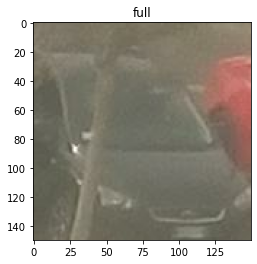

In [59]:
image, label = next(iter(ds_train))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))